# Load dependencies

In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr
from script.ddG2ee import get_ddG2ee
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
import warnings
warnings.filterwarnings("ignore")

In [2]:
des=np.load('./data/des.npy')
ddg=np.load('./data/ddg.npy')
acid_index=np.load('./data/acid_index.npy')
sub_smi=np.load('./data/sub_smi.npy')
alk_smi=np.load('./data/alk_smi.npy')
acid_smi=np.load('./data/acid_smi.npy')

In [3]:
for index,i in enumerate(acid_smi):
    for j in ['O=C(C1=CC=C(C)S1)N2C(C(O)=O)N(C(C3=CC=C(C)S3)=O)[C@@H](C4=CC=CC=C4)[C@@H]2C5=CC=CC=C5',
        'O=C(C1=CC=CS1)N2C(C(O)=O)N(C(C3=CC=CS3)=O)[C@@H](C4=CC=CC=C4)[C@@H]2C5=CC=CC=C5',
        'O=C(C1=CC(C=CC=C2)=C2C=C1)N3C(C(O)=O)N(C(C4=CC=C(C=CC=C5)C5=C4)=O)[C@@H](C6=CC=CC=C6)[C@@H]3C7=CC=CC=C7',
        'O=C(CC1=CC=CC=C1)N2C(C(O)=O)N(C(CC3=CC=CC=C3)=O)[C@@H](C4=CC=CC=C4)[C@@H]2C5=CC=CC=C5']:
        if Chem.MolToSmiles(Chem.MolFromSmiles(i))== Chem.MolToSmiles(Chem.MolFromSmiles(j)) and index>69:
            print(index,i)

81 C7=CC=CC=C7[C@H]4[C@H](C8=CC=CC=C8)N(C(C5=CC=CS5)=O)C(C(O)=O)N4C(C6=CC=CS6)=O
121 C7=CC=CC=C7[C@H]1[C@H](C8=CC=CC=C8)N(C(C2=CC=C(C)S2)=O)C(C(O)=O)N1C(C1=CC=C(C)S1)=O
122 C7=CC=CC=C7[C@H]1[C@H](C8=CC=CC=C8)N(C(C2=CC=C(C=CC=C3)C3=C2)=O)C(C(O)=O)N1C(C1=CC(C=CC=C2)=C2C=C1)=O
128 C7=CC=CC=C7[C@H]1[C@H](C8=CC=CC=C8)N(C(CC2=CC=CC=C2)=O)C(C(O)=O)N1C(CC1=CC=CC=C1)=O


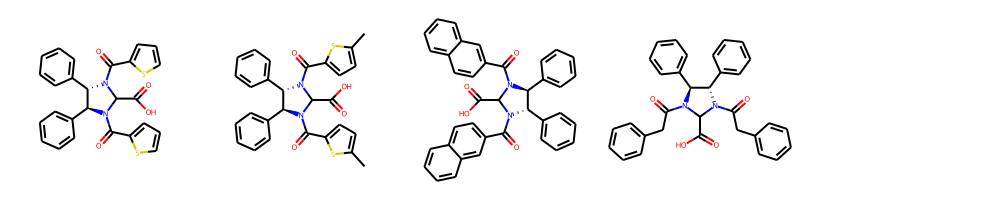

In [4]:
mol=[Chem.MolFromSmiles(acid_smi[i]) for i in [81,121,122,128]]
img = Draw.MolsToGridImage(mol,molsPerRow=5,subImgSize=(200,200),legends=['' for x in mol])
img

# Base Model

In [5]:
sel_index1=np.array([2,12,17,21,25,28,34,37,39,40,41,42,43,50,53,57,65,73,74,75,76,83,86,89,94,97,107])
des_sel1=des[:,sel_index1]
sel_index2=sel_index1
des_sel2=des[:,sel_index2]

train_index=list(range(59))
test_index=list(range(69,69+360))

train_x,train_y = des_sel1[train_index],ddg[train_index]
test_x = des_sel1[test_index]
model = LinearSVR(random_state=2023)

all_pred=[]
for i in range(10):
    model.fit(train_x,train_y)
    pred =model.predict(test_x)
    all_pred.append(pred)
all_pred=np.mean(np.array(all_pred),axis=0)

# Rusults of LOO

Text(0.65, 1.7, 'MAE: 0.071')

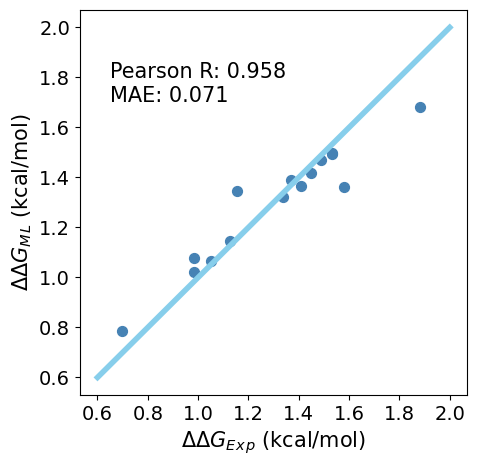

In [6]:
test_y=np.array([1.5795713422144708,1.446973346104579,1.5324892332496296,1.5324892332496296,1.4884204507049261,
                 1.4078275394902993,1.1262267890912196,0.9824205134897465,1.0512276794722508,0.9824205134897465,
                 1.1528583280024276,0.6992653412939249,1.3354211644485545,1.8828442962463308,1.3707176034608253,
                 1.40782754, 2.05942156, 1.48842045])

result=np.load('./data/grad_results15.npy',allow_pickle=True)
y_pred=result[45][-2]
y_test=test_y[:15]

start_point=0.6
end_point=2.0
fig = plt.figure(figsize=(5,5))
plt.xticks(np.arange(start_point, end_point+0.1, step=0.2),fontsize=14)
plt.yticks(np.arange(start_point, end_point+0.1, step=0.2),fontsize=14)
plt.xlabel('$\Delta$$\Delta$$G_E$$_x$$_p$ (kcal/mol)',fontsize=15)
plt.ylabel('$\Delta$$\Delta$$G_M$$_L$ (kcal/mol)',fontsize=15)
plt.plot([start_point,end_point],[start_point,end_point],c='skyblue',linewidth=4)#skyblue
plt.scatter(np.array(y_test),np.array(y_pred),c='steelblue',s=50, alpha=1)#steelblue
plt.text(start_point+0.05,1.8,'Pearson R: %.3f'%pearsonr(np.array(y_test),np.array(y_pred))[0],fontsize=15)
plt.text(start_point+0.05,1.7,'MAE: %.3f'%mean_absolute_error(np.array(y_test),np.array(y_pred)),fontsize=15)

# Validated data: Top-3+4

In [7]:
sel_index1=np.array([2,12,17,21,25,28,34,37,39,40,41,42,43,50,53,57,65,73,74,75,76,83,86,89,94,97,107])
des_sel1=des[:,sel_index1]
sel_index2=[53, 46, 73, 95, 72, 76, 84, 29, 68, 9, 2, 34, 107, 37, 14, 5, 1, 4, 40, 11, 27, 8, 12, 10, 19, 33, 17, 30, 32, 15, 31, 25, 86, 59, 56, 60, 96, 99, 106, 28, 39, 36, 22, 67, 74, 35]
des_sel2=des[:,sel_index2]

train_index=list(range(59))
test_index=list(range(59,69))+ [104,128,136,144,147]+[71,87,115]+[81,121,122,128]

train_x,train_y = des_sel1[train_index],ddg[train_index]
test_x = des_sel1[test_index]
model = LinearSVR(random_state=2023)

pred_23=[]
for i in range(10):
    model.fit(train_x,train_y)
    pred =model.predict(test_x)
    pred_23.append(pred)
pred_23=np.mean(np.array(pred_23),axis=0)

In [8]:
test_index=np.array([71,87,115,81,121,122,128])-69
all_pred_test=all_pred[test_index]

In [9]:
test_index=[71,87,115,81,121,122,128]
val_index=list(range(59,69))+ [104,128,136,144,147]+[71,87,115]+[81,121,122,128]
delta=test_y[:15]-all_pred[:15]
val_x2,test_x2 = des_sel2[val_index],des_sel2[test_index]


model = LinearSVR(random_state=2023)
all_delta_pred=[]
for i in range(20):
    model.fit(val_x2[:15],delta)
    pred =model.predict(test_x2)
    all_delta_pred.append(pred)
all_delta_pred=np.mean(np.array(all_delta_pred),axis=0)
y=all_delta_pred+all_pred_test
y  

array([1.69329127, 1.62493395, 1.58556086, 1.3526483 , 1.04828699,
       0.92360596, 0.76495099])

In [10]:
get_ddG2ee(y)

array([0.89119169, 0.87870412, 0.87091483, 0.81457448, 0.70834594,
       0.65197847, 0.56826959])

Text(0.65, 1.7, 'MAE: 0.122')

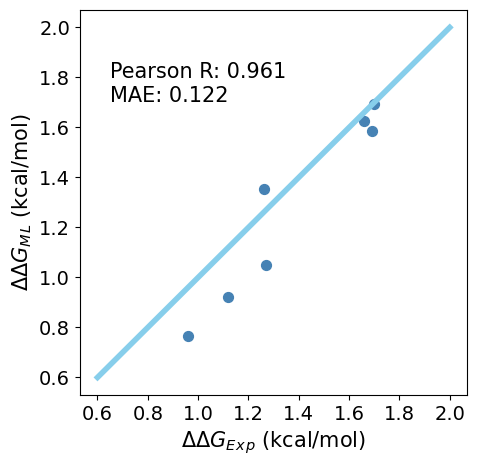

In [11]:
y_pred=y
y_test= np.round(np.array(pd.read_csv('./data/360_acids_results.csv')['ddg'].to_list())[np.array(test_index)-69],2)[:7]  

start_point=0.6
end_point=2.0
fig = plt.figure(figsize=(5,5))
plt.xticks(np.arange(start_point, end_point+0.1, step=0.2),fontsize=14)
plt.yticks(np.arange(start_point, end_point+0.1, step=0.2),fontsize=14)
plt.xlabel('$\Delta$$\Delta$$G_E$$_x$$_p$ (kcal/mol)',fontsize=15)
plt.ylabel('$\Delta$$\Delta$$G_M$$_L$ (kcal/mol)',fontsize=15)
plt.plot([start_point,end_point],[start_point,end_point],c='skyblue',linewidth=4)#skyblue
plt.scatter(np.array(y_test),np.array(y_pred),c='steelblue',s=50, alpha=1)#steelblue
plt.text(start_point+0.05,1.8,'Pearson R: %.3f'%pearsonr(np.array(y_test),np.array(y_pred))[0],fontsize=15)
plt.text(start_point+0.05,1.7,'MAE: %.3f'%mean_absolute_error(np.array(y_test),np.array(y_pred)),fontsize=15)